In [2]:
# Importing all the Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
init_notebook_mode(connected=True)

In [3]:
df=pd.read_csv('../original_data/KAIST_kpopradar_instagram_20230930.csv')

In [4]:
df.head()

,artist_id,artist_name,account_name,url,date,followers
0,1269,AB6IX (에이비식스),@ab6ix_official,https://www.instagram.com/ab6ix_official/,20190427,376664
1,5,TWICE (트와이스),@twicetagram,https://www.instagram.com/twicetagram/,20190429,8649792
2,10,Wanna One (워너원),NaN,https://www.instagram.com/wannaone.official/,20190429,4020876
3,11,엔플라잉 (N.Flying),@letsroll_nf,https://www.instagram.com/letsroll_nf/,20190429,145788
4,30,양요섭,@yysbeast,https://www.instagram.com/yysbeast/,20190429,1302606


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168869 entries, 0 to 1168868
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   artist_id     1168869 non-null  int64 
 1   artist_name   1168869 non-null  object
 2   account_name  350233 non-null   object
 3   url           1168869 non-null  object
 4   date          1168869 non-null  int64 
 5   followers     1168869 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 53.5+ MB


In [6]:
# Get specified data for BLACKPINK artist_name, type conversion of 'date' column to datetime

BLACKPINK_df = df[df['artist_name'] == 'BLACKPINK'].sort_values('date')
BLACKPINK_df['date'] = pd.to_datetime(BLACKPINK_df['date'], format='%Y%m%d')
BLACKPINK_df

,artist_id,artist_name,account_name,url,date,followers
41,326,BLACKPINK,@blackpinkofficial,https://www.instagram.com/blackpinkofficial/,2019-04-29,17893653
150,326,BLACKPINK,@blackpinkofficial,https://www.instagram.com/blackpinkofficial/,2019-04-30,17933481
259,326,BLACKPINK,@blackpinkofficial,https://www.instagram.com/blackpinkofficial/,2019-05-01,17973442
368,326,BLACKPINK,@blackpinkofficial,https://www.instagram.com/blackpinkofficial/,2019-05-02,18020520
477,326,BLACKPINK,@blackpinkofficial,https://www.instagram.com/blackpinkofficial/,2019-05-03,18068915
...,...,...,...,...,...,...
1163795,326,BLACKPINK,@blackpinkofficial,https://www.instagram.com/blackpinkofficial/,2022-12-09,51145549
1164843,326,BLACKPINK,@blackpinkofficial,https://www.instagram.com/blackpinkofficial/,2022-12-10,51170271
1165891,326,BLACKPINK,@blackpinkofficial,https://www.instagram.com/blackpinkofficial/,2022-12-11,51178037
1166939,326,BLACKPINK,@blackpinkofficial,https://www.instagram.com/blackpinkofficial/,2022-12-12,51195776


In [7]:
from matplotlib.ticker import ScalarFormatter, MaxNLocator
import matplotlib.dates as mdates

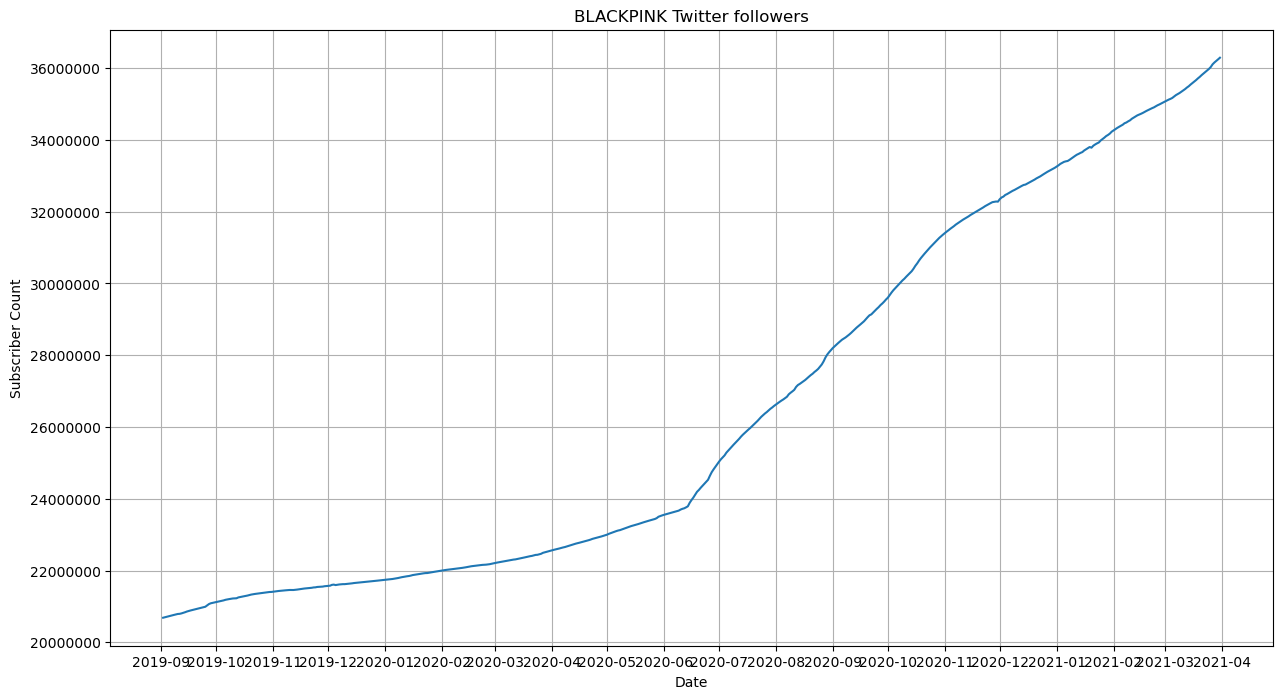

In [21]:
# Replace 'specified_date' with the date you want to compare against (in datetime format)
start_date = pd.to_datetime('2019-09-01') ### Change Here!
end_date = pd.to_datetime('2021-04-01')
quantity_name = 'followers' ### Type the column name of desired quantity!

# Filter the DataFrame to get rows with date greater than specified_date
filtered_BLACKPINK_df = BLACKPINK_df[(BLACKPINK_df['date'] > start_date) & (BLACKPINK_df['date'] < end_date)]

plt.figure(figsize = (15,8))
plt.plot(filtered_BLACKPINK_df['date'], filtered_BLACKPINK_df[quantity_name])

# Apply ScalarFormatter to the y-axis (subscriber_count)
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='y')  # Another way to disable scientific notation

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Show grid
plt.grid(True)

plt.title('BLACKPINK Twitter' + ' ' + quantity_name)
plt.xlabel('Date')
plt.ylabel('Subscriber Count')

plt.show()

In [9]:
#Combining two graph

In [10]:
df_yousub = pd.read_csv('../original_data/KAIST_kpopradar_youtube_channel_20230930.csv')

In [11]:
df_yousub = df_yousub[df_yousub['artist_name'] == 'BLACKPINK'].sort_values('date')
df_yousub['date'] = pd.to_datetime(df_yousub['date'], format='%Y%m%d')
df_yousub

,artist_id,artist_name,account_name,url,date,subscriber_count
24,326,BLACKPINK,BLACKPINK,https://www.youtube.com/channel/UCOmHUn--16B90...,2018-09-28,12125238
84,326,BLACKPINK,BLACKPINK,https://www.youtube.com/channel/UCOmHUn--16B90...,2018-09-29,12160193
147,326,BLACKPINK,BLACKPINK,https://www.youtube.com/channel/UCOmHUn--16B90...,2018-09-30,12193787
210,326,BLACKPINK,BLACKPINK,https://www.youtube.com/channel/UCOmHUn--16B90...,2018-10-01,12219565
273,326,BLACKPINK,BLACKPINK,https://www.youtube.com/channel/UCOmHUn--16B90...,2018-10-02,12244366
...,...,...,...,...,...,...
706049,326,BLACKPINK,BLACKPINK,https://www.youtube.com/channel/UCOmHUn--16B90...,2023-09-26,91400000
706600,326,BLACKPINK,BLACKPINK,https://www.youtube.com/channel/UCOmHUn--16B90...,2023-09-27,91400000
707151,326,BLACKPINK,BLACKPINK,https://www.youtube.com/channel/UCOmHUn--16B90...,2023-09-28,91500000
707702,326,BLACKPINK,BLACKPINK,https://www.youtube.com/channel/UCOmHUn--16B90...,2023-09-29,91500000


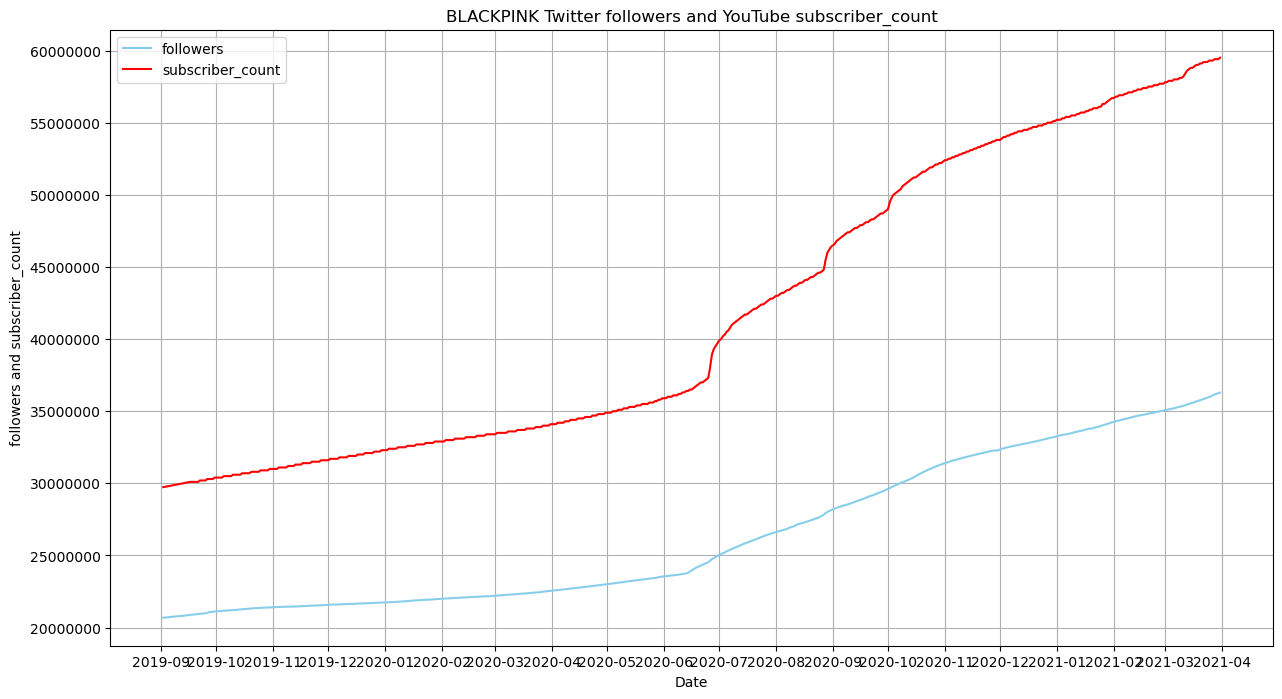

In [24]:
# Replace 'specified_date' with the date you want to compare against (in datetime format)
start_date = pd.to_datetime('2019-09-01') ### Change Here!
end_date = pd.to_datetime('2021-04-01')
quantity_name = 'followers' ### Type the column name of desired quantity!
quantity_name2 = 'subscriber_count'

# Filter the DataFrame to get rows with date greater than specified_date
filtered_BLACKPINK_df = BLACKPINK_df[(BLACKPINK_df['date'] > start_date) & (BLACKPINK_df['date'] < end_date)]

filtered_BLACKPINK_yousub_df = df_yousub[(df_yousub['date'] > start_date) & (df_yousub['date'] < end_date)]

plt.figure(figsize = (15,8))
plt.plot(filtered_BLACKPINK_df['date'], filtered_BLACKPINK_df[quantity_name], label = quantity_name, color = 'skyblue')
plt.plot(filtered_BLACKPINK_yousub_df['date'], filtered_BLACKPINK_yousub_df[quantity_name2], label = quantity_name2, color = 'red')
# You Can Specify the Label of each plot

# Apply ScalarFormatter to the y-axis (subscriber_count)
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='y')  # Another way to disable scientific notation

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Show grid
plt.grid(True)

# Show the Legend
plt.legend()

plt.title('BLACKPINK' + ' ' + 'Twitter ' + quantity_name + ' and ' + 'YouTube ' + quantity_name2)
plt.xlabel('Date')
plt.ylabel(quantity_name + ' and ' + quantity_name2)

plt.show()